1. Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Getting the file names

In [ ]:
from os import listdir
from os.path import isfile, join

def get_file_names():

    norm_files = [f for f in listdir('/content/drive/MyDrive/python_code_major/healthy') ]
    schiz_files = [f for f in listdir('/content/drive/MyDrive/python_code_major/schizophrenic') ]
    schiz_list=[]
    for item in schiz_files:
        newl='/content/drive/MyDrive/python_code_major/schizophrenic/'+item
        schiz_list.append(newl)
    norm_list=[]
    for item in norm_files:
        newl='/content/drive/MyDrive/python_code_major/healthy/'+item
        norm_list.append(newl)

    compiled_list = [*schiz_list, *norm_list]
    return compiled_list

3. accessing the files to get the data

['/content/drive/MyDrive/python_code_major/schizophrenic/33w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/155w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/517w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/485w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/312w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/088w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/276w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/382w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/221w.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/510-1W.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/683w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/575w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/219w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/515w1.eea', '/content/drive/MyDrive/python_code_major/schizo

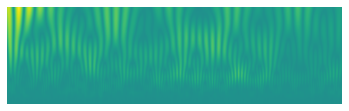

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import csv
import pywt

num=75
comp_list = get_file_names()
print(comp_list)
eff_list = comp_list[74:85]
results_dir = '/content/drive/MyDrive/python_code_major/new_images/electrode_1/'
for item in eff_list:
    file = open(item)
    csvreader = csv.reader(file)
    part1='per'+str(num)+'_'
    print("person "+str(num))
    num+=1
    if 'schizophrenic' in item:
        part2='schiz_'
    elif 'healthy' in item:
        part2='norm_'
    xmain = []
    for row in csvreader:
        xmain.append(float(row[0]))
    xmain= xmain[0:7560]
    part3='1_'
    nested_first=0
    nested_last = 630
    for i in range (0,12):
      part4=str(i+1)
      y=xmain[nested_first:nested_last]
      scales = np.arange(1,31)
      coef, freqs = pywt.cwt(y, scales, 'morl')  
      plt.imshow(abs(coef), extent=[0, 200, 30, 1], interpolation='bilinear', cmap = 'viridis',   aspect='2', vmax=abs (coef) .max(), vmin=-abs(coef) .max())
      plt.axis('off')
      plt.gca().invert_yaxis()
      title = part1 + part2 + part3 + part4
      plt.savefig(results_dir+title,bbox_inches='tight', pad_inches=0)
      nested_first=nested_last
      nested_last=nested_last+630

         

combining multiple plots to get 1 electrode consolidated plot

In [4]:
import sys
from os import listdir
from PIL import Image
norm_files = [f for f in listdir('/content/drive/MyDrive/python_code_major/electrode_1/') ]
final = []
for item in norm_files:
  final.append('/content/drive/MyDrive/python_code_major/electrode_1/'+str(item))
  final = final[0:13]
images = [Image.open(x) for x in final]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test1.jpg')

In [ ]:
import PIL
image = PIL.Image.open("test.jpg")

width, height = image.size

print(width, height)

4008 97
